# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Load Customer and Transaction data

In [9]:
Customers_df = pd.read_csv("D:\DS with Py\Zeotap Task\Customers.csv")
Transactions_df = pd.read_csv("D:\DS with Py\Zeotap Task\Transactions.csv")

In [36]:
Customers_df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [37]:
Transactions_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


# Data Preprocessing and Feature Engineering

In [12]:
# Merge customer and transaction data on 'cust_id'
merged_df = pd.merge(Customers_df, Transactions_df, on='CustomerID')

In [38]:
merged_df

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64
...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40


In [14]:
# Aggregate transaction features
agg_transactions = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'count',
    'Price': 'mean',
    # Add more transaction-based features if needed
}).reset_index()

In [39]:
agg_transactions

,CustomerID,TotalValue,Quantity,Price
0,C0001,3354.52,5,278.334000
1,C0002,1862.74,4,208.920000
2,C0003,2725.38,4,195.707500
3,C0004,5354.88,8,240.636250
4,C0005,2034.24,3,291.603333
...,...,...,...,...
194,C0196,4982.88,4,416.992500
195,C0197,1928.65,3,227.056667
196,C0198,931.83,2,239.705000
197,C0199,1979.28,4,250.610000


In [15]:
# Combine profile and transaction features
final_df = pd.merge(Customers_df, agg_transactions, on='CustomerID')

In [40]:
final_df

,CustomerID,CustomerName,Region,SignupDate,TotalValue,Quantity,Price,cluster
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5,278.334000,3
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4,208.920000,2
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4,195.707500,2
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8,240.636250,1
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3,291.603333,0
...,...,...,...,...,...,...,...,...
194,C0196,Laura Watts,Europe,2022-06-07,4982.88,4,416.992500,0
195,C0197,Christina Harvey,Europe,2023-03-21,1928.65,3,227.056667,2
196,C0198,Rebecca Ray,Europe,2022-02-27,931.83,2,239.705000,2
197,C0199,Andrea Jenkins,Europe,2022-12-03,1979.28,4,250.610000,2


In [20]:
# Select features for clustering (profile + transaction data)
features = final_df[['TotalValue', 'Quantity', 'Price']]

In [41]:
features

,TotalValue,Quantity,Price
0,3354.52,5,278.334000
1,1862.74,4,208.920000
2,2725.38,4,195.707500
3,5354.88,8,240.636250
4,2034.24,3,291.603333
...,...,...,...
194,4982.88,4,416.992500
195,1928.65,3,227.056667
196,931.83,2,239.705000
197,1979.28,4,250.610000


In [21]:
# Standardizing the features (important for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [42]:
scaled_features

array([[-6.17014282e-02, -1.14581896e-02,  9.46702248e-02],
       [-8.77743532e-01, -4.67494136e-01, -9.04015921e-01],
       [-4.05857221e-01, -4.67494136e-01, -1.09410928e+00],
       [ 1.03254704e+00,  1.35664965e+00, -4.47701928e-01],
       [-7.83928612e-01, -9.23530083e-01,  2.85581271e-01],
       [ 4.15879421e-01, -4.67494136e-01,  8.67287344e-01],
       [-4.85482293e-01, -9.23530083e-01,  1.12604452e+00],
       [ 4.39970436e-01,  2.26872154e+00, -5.84040413e-01],
       [-1.40630171e+00, -9.23530083e-01,  3.89602086e-01],
       [-9.57166204e-01, -4.67494136e-01, -1.70467406e+00],
       [ 1.43695808e-01, -1.14581896e-02,  3.00323548e-01],
       [ 9.64923716e-01,  9.00613703e-01, -1.37449092e-02],
       [ 1.38575064e+00,  9.00613703e-01,  7.05501167e-01],
       [-1.72239508e+00, -1.83560198e+00, -1.61748649e+00],
       [-1.26353893e+00, -1.37956603e+00,  1.20905974e+00],
       [ 2.22697270e-01, -1.14581896e-02,  1.72067526e+00],
       [ 7.03751732e-01,  1.35664965e+00

In [35]:
# Find optimal number of clusters using the Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init = 10,random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

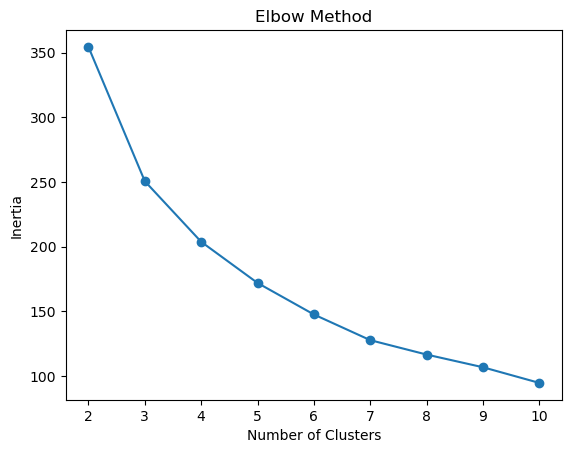

In [23]:
# Plot Elbow Curve to determine optimal k
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [24]:
# Choose optimal k (let's assume it's 4 based on the Elbow Method)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [25]:
# Cluster labels
labels = kmeans.labels_

In [26]:
# Calculate Clustering Metrics:
db_index = davies_bouldin_score(scaled_features, labels)
silhouette = silhouette_score(scaled_features, labels)

In [27]:
print(f"Number of clusters: {k}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")

Number of clusters: 4
Davies-Bouldin Index: 1.0032
Silhouette Score: 0.3017


In [28]:
# Visualize Clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

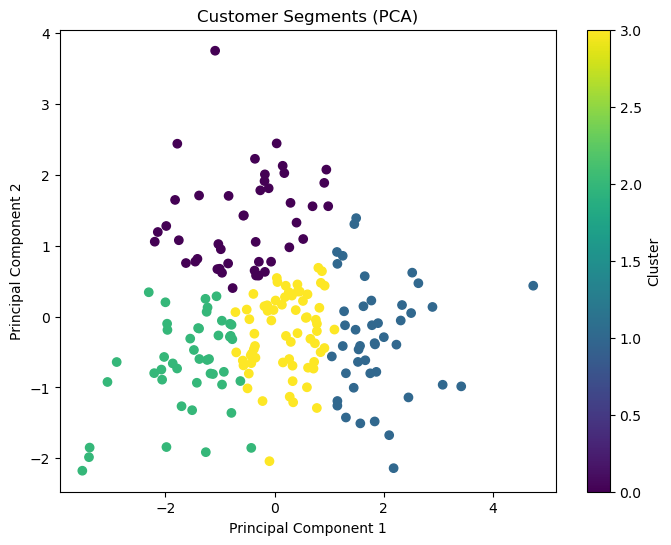

In [29]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=labels, cmap='viridis')
plt.title('Customer Segments (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [30]:
# Save the clustering results to a new DataFrame and output to CSV
final_df['cluster'] = labels
final_df.to_csv('Customer_Segments.csv', index=False)


In [31]:
print("Clustering results saved to 'Customer_Segments.csv'")

Clustering results saved to 'Customer_Segments.csv'
